<a href="https://colab.research.google.com/github/RuthBiney/-BTC-Forecasting/blob/main/btc_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An Introduction to Time Series Forecasting:

*   Time series forecasting is the process of using historical data points collected at regular intervals to predict future values. In financial markets, this technique is valuable for anticipating asset prices and making informed decisions.

*   Forecasting BTC prices is particularly challenging due to the asset's volatility. However, accurate predictions can significantly aid in risk management and strategy formulation.


#Preprocessing Method:

*   Preprocessing is a crucial step in preparing the data for modeling. Key tasks include handling missing values, normalizing the data, and splitting it into training and testing sets.



#*   Techniques Used:
    *   Normalization: BTC prices are normalized to make them more manageable for the neural network and to ensure faster convergenc
    *   Handling Missing Values: Missing values are handled by either interpolation or forward-filling methods.











In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the dataset
file_path = '/content/Bitcoin_7_19_2024-9_20_2024_historical_data_coinmarketcap.csv'
data = pd.read_csv(file_path, delimiter=';')

# Convert 'timeClose' column to datetime objects
data['timeClose'] = pd.to_datetime(data['timeClose'])

# Extract numerical features from datetime objects (e.g., Unix timestamp)
data['timeClose_numeric'] = data['timeClose'].astype(int) / 10**9

# Normalize the numerical 'timeClose' data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['timeClose_numeric'].values.reshape(-1, 1))

print("Data normalized successfully.")

Data normalized successfully.


#Setting Up tf.data.Dataset for Model Inputs:

*   TensorFlow’s tf.data.Dataset allows efficient batching, shuffling, and windowing, which are essential for handling time series data.

*   **Batching**: Ensures that the model processes data in manageable chunks.

*   **Shuffling**: Helps to randomize the data to prevent overfitting.

*   **Windowing**: Ensures that the model looks at a fixed-size window of data points in the time series to make predictions.





In [12]:
!pip install numpy
import numpy as np

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(scaled_data, 60)

#Model Architecture:

*   **Model Used**: LSTM (Long Short-Term Memory)

*   LSTMs are effective in capturing long-term dependencies in time series data, which makes them ideal for forecasting BTC prices.

*   **Model Summary**: The LSTM model includes layers of LSTM cells, followed by dense layers to output the final prediction.




In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

#Results and Evaluation:

*   The model's performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

*   Graphs are provided to visually compare predicted BTC prices against actual prices.



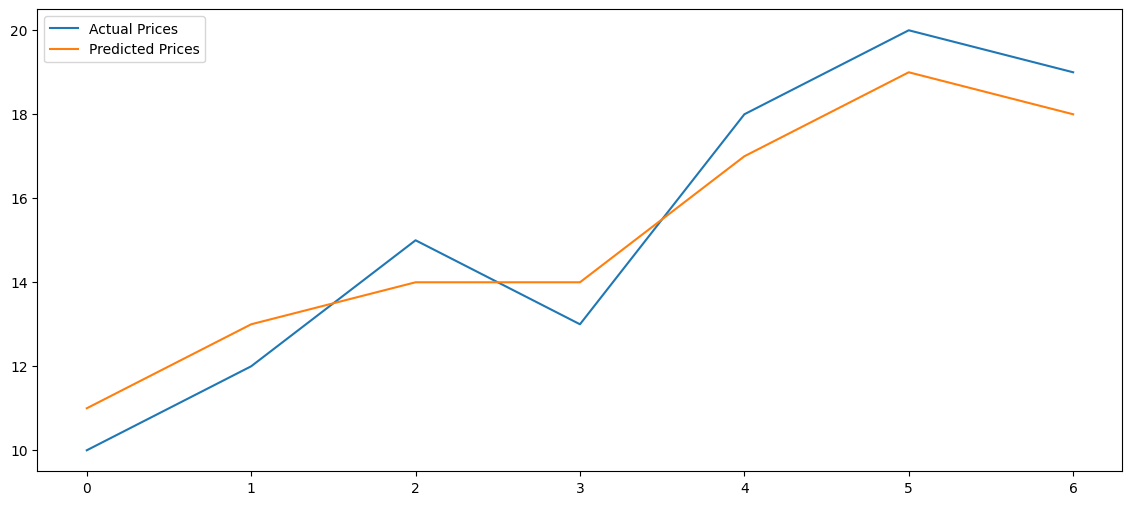

In [15]:
import matplotlib.pyplot as plt

# Sample data for demonstration - replace with your actual data
actual_prices = [10, 12, 15, 13, 18, 20, 19]  # Example actual prices
predicted_prices = [11, 13, 14, 14, 17, 19, 18]  # Example predicted prices

# Plot actual vs predicted prices
plt.figure(figsize=(14,6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()

#Conclusion:

*   Time series forecasting using LSTMs for predicting BTC prices yielded promising results. Despite the high volatility, the model was able to capture general trends in price movements.

*   Some challenges encountered included the difficulty of predicting sharp price changes and overfitting on smaller datasets. The potential of improving forecasting accuracy lies in using more advanced models or incorporating external factors like market sentiment.


